<a href="https://colab.research.google.com/github/Pancerro/175IC-machine-learning/blob/main/zad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: catego

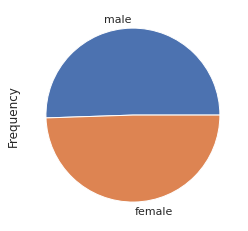

In [120]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import sys
np.random.seed(17)
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df = df_raw.copy()
df.info()
df[df.duplicated()]
df.drop_duplicates()
df.isnull().sum()
for col in ['sex', 'smoker', 'region']:
    df[col] = df[col].astype('category')
df.info()
df.sex.value_counts()
df.sex.value_counts().plot(kind='pie')
df.smoker.value_counts()
df.charges.plot(kind='hist',bins=30)
px.histogram(df,x='charges', width=700,height=400,nbins=50,facet_col='smoker',facet_row='sex')

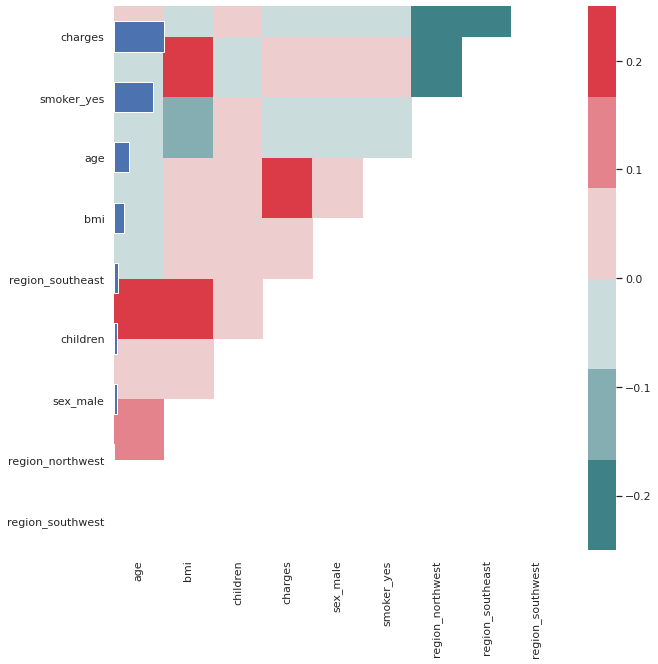

In [156]:
df_dummies = pd.get_dummies(df,drop_first=True)
df_dummies
corr = df_dummies.corr()
corr
sns.set(style="white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(200,10)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.25,vmin=-0.25)


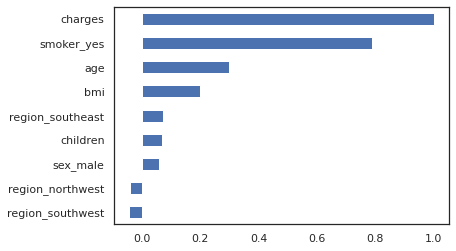

In [157]:
df_dummies.corr()['charges'].sort_values(ascending=False)
df_dummies.corr()['charges'].sort_values().plot(kind='barh')

wynik r2: 0.77
MAE= 4021.4


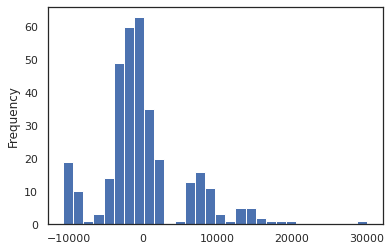

In [168]:
charges_column = df_dummies['charges']
data_frame_without_charges = df_dummies.drop(columns='charges')
x_train, x_test, y_train, y_test = train_test_split(data_frame_without_charges, charges_column)

regressor = LinearRegression()
regressor.fit(x_train, y_train)
r2 = regressor.score(x_test, y_test) #tu
print(f"wynik r2: {round(r2,2)}")

y_pred = regressor.predict(x_test)
y_pred[:10]

y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()
predictions['error'].plot(kind='hist', bins=30)

mae_value = mean_absolute_error(y_true, y_pred)
print(f"MAE= {round(mae_value,2)}")

In [166]:
print('Zadanie 2')
x_train_ols = sm.add_constant(x_train.values)
ols = sm.OLS(endog=y_train, exog=x_train_ols).fit()
predictors = ['const'] + list(x_train.columns)
summary = ols.summary2(xname=predictors) #tu
print(summary)
deleteColumn = summary.tables[1]['P>|t|']>0.05
deleteColumn = deleteColumn.drop('const')
print(deleteColumn.index)

newTable = df_dummies.drop(columns=deleteColumn.index)
charges_column = newTable['charges']
data_frame_without_charges = newTable.drop(columns='charges')
x_train, x_test, y_train, y_test = train_test_split(data_frame_without_charges, charges_column)
regressor.fit(x_train, y_train)
r2_2 = regressor.score(x_test, y_test)
y_pred = regressor.predict(x_test)
y_true = y_test.copy()
mae_value2 = mean_absolute_error(y_true, y_pred)
print(f"MAE 2 = {round(mae_value2,2)}")
print(f"R2: {r2}")
print(f"R2_2: {r2_2}")
def get_change(current, previous):
    if current == previous:
        return 0
    try:
        return (abs(current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return float('inf')

print(f"R2 % roznica: {round(get_change(r2,r2_2),2)}%")
print(f"MAE % roznica: {round(get_change(mae_value,mae_value2),2)}%")

dummies_size = sys.getsizeof(df_dummies)
result_size = sys.getsizeof(result_data_frame)
print(f"Miejsce % roznica: {round(get_change(dummies_size, result_size),2)}%")


Zadanie 2
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.000    
Dependent Variable: charges          AIC:                21695.1145
Date:               2020-12-01 16:50 BIC:                21700.0253
No. Observations:   1003             Log-Likelihood:     -10847.   
Df Model:           0                F-statistic:        -inf      
Df Residuals:       1002             Prob (F-statistic): nan       
R-squared:          -0.000           Scale:              1.4487e+08
--------------------------------------------------------------------
         Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
--------------------------------------------------------------------
const  13331.5248  380.0488  35.0785  0.0000  12585.7419  14077.3077
-------------------------------------------------------------------
Omnibus:              252.679       Durbin-Watson:          2.082  
Prob(Omnibus):        0.000         Jarque-Bera (JB)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning:

divide by zero encountered in double_scalars

